In [244]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [245]:
turkish_characters = "a|b|c|ç|d|e|f|g|ğ|h|ı|i|j|k|l|m|n|o|ö|p|r|s|ş|t|u|ü|v|y|z|0-9"
data = pd.read_csv('equal_duygu.csv',sep=',')

In [246]:
data.head()

,Yorum,Duygu
0,çarşamba günü sipariş verdim orda yaizıyor sal...,1
1,1 yıl dayanmadı ıdare eder demıcem cunku etmed...,0
2,1 günde yozgattan hataya geldi hızlı kargo ve ...,1
3,dunden beri bekliyorum hala kargolamadiniz,0
4,bayrama yetişsin dedik ama.dün sözde kargolaya...,0


In [247]:
data = data[['Yorum','Duygu']]


In [248]:
# Veri Setinin temizlenmesi.
data['Yorum'] = data['Yorum'].apply(lambda x: x.lower())
data['Yorum'] = data['Yorum'].apply((lambda x: re.sub('[^'+turkish_characters+'\s]','',x)))


In [249]:
data['Yorum'][3]


'dunden beri bekliyorum hala kargolamadiniz'

In [250]:
y = data['Duygu']
X = data['Yorum']

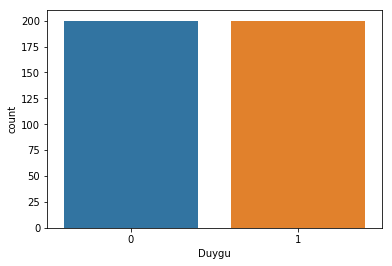

In [251]:
import seaborn as sns

sns.countplot(x='Duygu', data=data)

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)


In [253]:
tokenizer = Tokenizer(num_words=2500)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [254]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 400

X_train = pad_sequences(X_train , maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [255]:
X_train[134]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

# Text Classification with Simple Neural Network

In [256]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 128, input_length=X_train.shape[1] )
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [257]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 400, 128)          426624    
_________________________________________________________________
flatten_12 (Flatten)         (None, 51200)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 51201     
Total params: 477,825
Trainable params: 477,825
Non-trainable params: 0
_________________________________________________________________
None


In [258]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)


Train on 256 samples, validate on 64 samples
Epoch 1/6
256/256 [==============================] - 1s 4ms/step - loss: 0.7185 - acc: 0.5078 - val_loss: 0.6856 - val_acc: 0.4688
Epoch 2/6
256/256 [==============================] - 0s 246us/step - loss: 0.6674 - acc: 0.5859 - val_loss: 0.6695 - val_acc: 0.5625
Epoch 3/6
256/256 [==============================] - 0s 250us/step - loss: 0.6744 - acc: 0.5820 - val_loss: 0.6685 - val_acc: 0.6875
Epoch 4/6
256/256 [==============================] - 0s 246us/step - loss: 0.6430 - acc: 0.6289 - val_loss: 0.6977 - val_acc: 0.4375
Epoch 5/6
256/256 [==============================] - 0s 238us/step - loss: 0.6326 - acc: 0.5820 - val_loss: 0.6616 - val_acc: 0.6250
Epoch 6/6
256/256 [==============================] - 0s 250us/step - loss: 0.6096 - acc: 0.7422 - val_loss: 0.6427 - val_acc: 0.6719


In [259]:
score = model.evaluate(X_test, y_test, verbose=1)


80/80 [==============================] - 0s 225us/step


In [260]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6414071559906006
Test Accuracy: 0.675000011920929


In [261]:
import matplotlib.pyplot as plt


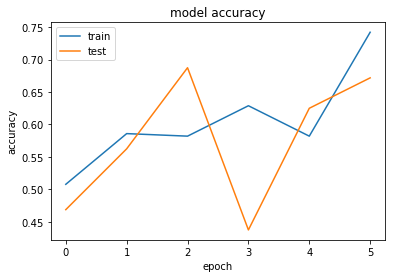

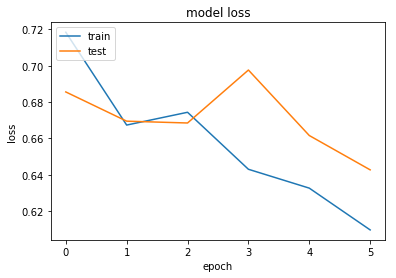

In [262]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Text Classification with a Convolutional Neural Network

In [263]:
from keras.layers.convolutional import Conv1D

model = Sequential()

embedding_layer = Embedding(vocab_size, 128, input_length=X_train.shape[1])
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [264]:
print(model.summary())


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 400, 128)          426624    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 396, 128)          82048     
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 129       
Total params: 508,801
Trainable params: 508,801
Non-trainable params: 0
_________________________________________________________________
None


In [265]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Train on 256 samples, validate on 64 samples
Epoch 1/6
256/256 [==============================] - 3s 11ms/step - loss: 0.6886 - acc: 0.5391 - val_loss: 0.6863 - val_acc: 0.5625
Epoch 2/6
256/256 [==============================] - 2s 7ms/step - loss: 0.6573 - acc: 0.6992 - val_loss: 0.6792 - val_acc: 0.6094
Epoch 3/6
256/256 [==============================] - 2s 7ms/step - loss: 0.6326 - acc: 0.8320 - val_loss: 0.6726 - val_acc: 0.6406
Epoch 4/6
256/256 [==============================] - 2s 7ms/step - loss: 0.6096 - acc: 0.9492 - val_loss: 0.6682 - val_acc: 0.6250
Epoch 5/6
256/256 [==============================] - 2s 7ms/step - loss: 0.5869 - acc: 0.9648 - val_loss: 0.6625 - val_acc: 0.6250
Epoch 6/6
80/80 [==============================] - 0s 2ms/step


In [266]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6399391293525696
Test Accuracy: 0.7124999761581421


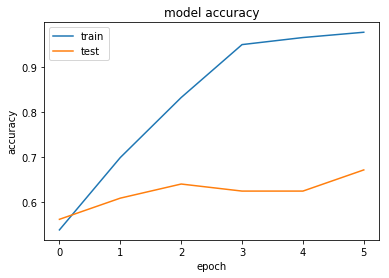

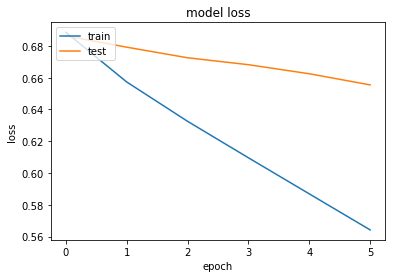

In [267]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# Text Classification with Recurrent Neural Network (LSTM)

In [268]:
from keras.layers import  LSTM  
model = Sequential()
embedding_layer = Embedding(vocab_size, 128, input_length=X_train.shape[1] )
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [269]:
print(model.summary())


Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 400, 128)          426624    
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 129       
Total params: 558,337
Trainable params: 558,337
Non-trainable params: 0
_________________________________________________________________
None


In [270]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Train on 256 samples, validate on 64 samples
Epoch 1/6
256/256 [==============================] - 5s 20ms/step - loss: 0.6927 - acc: 0.4531 - val_loss: 0.6854 - val_acc: 0.5469
Epoch 2/6
256/256 [==============================] - 3s 12ms/step - loss: 0.6829 - acc: 0.7148 - val_loss: 0.6770 - val_acc: 0.7188
Epoch 3/6
256/256 [==============================] - 3s 11ms/step - loss: 0.6702 - acc: 0.8477 - val_loss: 0.6607 - val_acc: 0.7031
Epoch 4/6
256/256 [==============================] - 3s 12ms/step - loss: 0.6501 - acc: 0.8164 - val_loss: 0.6321 - val_acc: 0.7188
Epoch 5/6
256/256 [==============================] - 3s 11ms/step - loss: 0.6156 - acc: 0.7852 - val_loss: 0.6134 - val_acc: 0.7188
Epoch 6/6
80/80 [==============================] - 1s 7ms/step


In [271]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6005666732788086
Test Accuracy: 0.7124999761581421


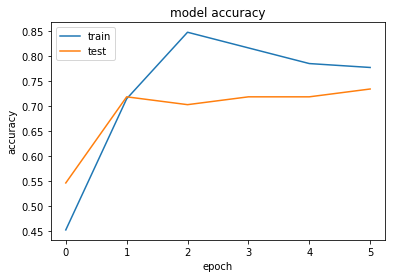

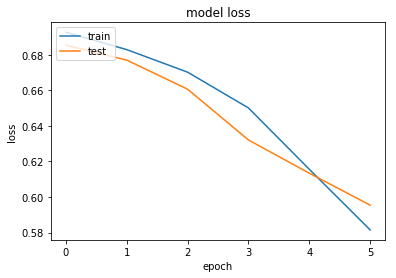

In [272]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#  Making Predictions on Single Instance


In [273]:
instance = X[57]
print(instance)
print(y[57])

samsung kalitesine güvendim tamdı ürün gelince ve kullanmaya başlayınca anlıyorsunuz çok zarif bir tasarımambalajı gayet sağlam yapmışlar kutu içinde kutu ile göndermişler yani paketleme özenliydikutu içerisinde 32 gb hafıza kartı varözellik olarak orta bir kullanıcı için fazlası ile işinizi görürtavsiye ederim
1


In [274]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, maxlen=maxlen)

model.predict(instance)

array([[0.35558277]], dtype=float32)